In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import scipy.stats, scipy.integrate
import scipy

In [2]:
a = 2
"""My pc fan goes wild when I try 500 n_samples"""
n_samples = 500
sample_size = 500
#n_bins = 100
cut_bins = list(np.linspace(0., 15., 50))
#print(cut_bins)

In [3]:
 a_est_list = np.zeros(shape=n_samples)

for i, a_val in enumerate(a_est_list):
    sample = scipy.stats.gamma.rvs(a, size=sample_size)

    sample_df = pd.DataFrame(sample)
    sample_df.head()
    #sample_df.plot(kind="hist")
    #bin_sample_df, bin_edges = pd.qcut(sample_df[0], q=n_bins, retbins=True)
    bin_sample_df, bin_edges = pd.cut(sample_df[0], bins=cut_bins, retbins=True)
    #print(bin_edges)
    
    def get_p_bins(a, bin_edges):
        p_bins = []
        for i_start in range(len(bin_edges)-1):
            bin_start = bin_edges[i_start]
            bin_stop = bin_edges[i_start + 1]
            #print("bin:{}, [{},{}]".format(i_start, bin_start, bin_stop))
            p_bins.append(scipy.stats.gamma.cdf(bin_stop, a) - scipy.stats.gamma.cdf(bin_start, a))
            #print(p_bins[-1])
        #p_bins = np.array(p_bins) / np.array(p_bins).sum()
        p_bins = np.array(p_bins)
        return p_bins

    p_bins = get_p_bins(a, bin_edges)

    #print(p_bins)  
    #print(sample_size*np.array(p_bins))
    #print(np.array(bin_sample_df.value_counts(sort=False)))



    """Minimize MSE with respect to multinominal distribution"""
    bin_sample_arr = np.array(bin_sample_df.value_counts())
    #print(bin_sample_arr)

    def mse_a(a):
        bin_sample_arr = np.array(np.array(bin_sample_df.value_counts(sort=False)))
        mse = np.sum( (bin_sample_arr - sample_size*get_p_bins(a, bin_edges))**2 )

        return mse
    """
    mse_lambda = lambda a: mse_a(a)
    best_a = scipy.optimize.minimize(mse_lambda, x0=4.).x
    print("scipy:{}".format(best_a))
    """
    """scipy optimize has trouble finding the minimum, which clearly is close to the original value a=2"""



    """Manually implement gradient descent for minimizing MSE"""
    def grad_desc(func=mse_a, a_0=0.):
        precision = 0.00001
        a_step = 0.0001
        lr = 0.0001
        a_0 = 4.
        reached_precision = False
        a_it = a_0
        counter = 0
        while ((reached_precision == False) and (counter <= 20)):
            a_jump = a_it + a_step
            grad = (mse_a(a_jump)-mse_a(a_it))/a_step
            #print(grad)
            a_it -= grad*lr
            #print(a_it)
            counter += 1
            if abs(grad*lr) <= precision:
                reached_precision = True

        return a_it

    print(grad_desc(mse_a, 3.))
    a_est_list[i] = grad_desc(mse_a, 3.)

2.0280105354087254
2.0672544049433554
2.054839840214413
1.9800083962918507
1.8762511694786497
2.03722045498273
1.9327808057662992
2.061653735706045
2.0801078391809824
2.030099482560786
1.9032911399580144
2.0718155787997716
1.9162096323350397
1.9062782829906553
2.0963425972485368
1.8688794488993494
2.0141260564238337
2.083964958276738
2.158364077918634
2.0163920967136164
1.9924246360045004
1.910775088313926
2.0002695301833455
1.9370917195037123
1.9883543389729539
1.9528166560098157
1.9978535765160927
2.0284382848208224
1.9328370665764396
1.993326106985137
2.0591677032221014
1.9071293099983109
1.8601248272869952
1.8523988815704797
2.0075906102406407
2.0666162429466794
2.04163502484289
1.9473389407687591
2.1147697914873334
1.9628702487821101
2.139502588368771
1.955716280120214
2.0680544390046975
1.9772218115929832
1.9834365316874454
1.899343763120271
2.0200084842061017
1.994243156552443
2.005446263806107
1.9942214850834716
1.9911203060137836
1.913287638224915
1.9810514755692452
2.06247800

1.9325190781236756
1.9836975957953769
1.956552411236828
1.9524472198572767
1.9340853691045368
2.01258567370013
1.8746980153714503
2.1088501169672327
1.9032023209153408
1.9638353000422057
2.035286163600972
1.9875554914029863
1.9820789492823394
1.921425285879593
2.078490648946172
2.072734067223905
2.0523115039668482
1.98408177196319
1.9544488920598155
1.9662880084447352
1.922360454336058
2.0513958245423396
2.07374292944462
2.2102853712236765
1.9564744923534931
1.9991709668839235
1.9961518127558975
1.980572388218718
1.9396924182562998
2.033764701383916
1.9983668918558806
2.0191934364519852
1.953644188626754
2.0077386628468616
2.154830072564863
1.953089309046561
1.9585946571920658
2.075549708194785
1.979595227560793
2.0485885433711246
1.9840693031761987
2.0222625512476498
1.9215784282885124
2.0410253567496
1.97998260058705
2.0984934370959536
1.890166938385505
1.9926410689836302
1.9519617097397486
2.034717162077868
1.9641019314404389
1.9939019859300515
2.0474144998607358
1.9932194276618986


In [4]:
print(a_est_list)
a_est_df = pd.DataFrame(a_est_list)
a_est_df.columns = ["ML estimated a"]
a_est_df.describe()

[2.02801054 2.0672544  2.05483984 1.9800084  1.87625117 2.03722045
 1.93278081 2.06165374 2.08010784 2.03009948 1.90329114 2.07181558
 1.91620963 1.90627828 2.0963426  1.86887945 2.01412606 2.08396496
 2.15836408 2.0163921  1.99242464 1.91077509 2.00026953 1.93709172
 1.98835434 1.95281666 1.99785358 2.02843828 1.93283707 1.99332611
 2.0591677  1.90712931 1.86012483 1.85239888 2.00759061 2.06661624
 2.04163502 1.94733894 2.11476979 1.96287025 2.13950259 1.95571628
 2.06805444 1.97722181 1.98343653 1.89934376 2.02000848 1.99424316
 2.00544626 1.99422149 1.99112031 1.91328764 1.98105148 2.06247801
 2.02874739 2.02343329 1.99718615 1.93497121 2.04538103 1.93577291
 1.9087519  2.10144476 2.02737108 2.09496411 1.98485217 2.00592336
 1.99341697 1.93190344 1.96362888 1.92244926 1.97081081 1.98749702
 1.98160844 2.03874439 2.0322231  1.99144767 2.02932372 2.04930712
 2.07069878 1.90292429 1.99717069 2.00654015 2.0018009  1.92559314
 2.04728266 2.01225092 1.92327096 1.95394956 1.98935439 2.0753

,ML estimated a
count,500.000000
mean,1.997349
std,0.071529
min,1.623588
25%,1.954622
50%,2.000671
75%,2.043064
max,2.210285


In [5]:
print("Variance of a estimators: {}".format(a_est_df.std()[0]**2))

Variance of a estimators: 0.005116404891543845


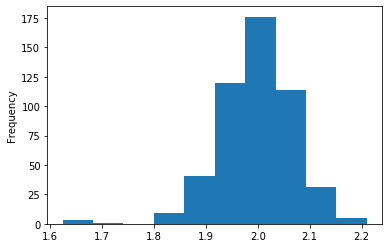

In [6]:
a_est_df["ML estimated a"].plot(kind="hist")

In [7]:
a_est_df["ML estimated score a"] = (a_est_df["ML estimated a"] - a)/(a_est_df.std()[0])